In [180]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Normalization,Dense,InputLayer
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import RootMeanSquaredError
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

from tensorflow.keras.optimizers import Adam

In [181]:

data = pd.read_csv("weee_data.csv", ",")

x_data = tf.constant(data.iloc[:, 3:75])

y_data = data.iloc[:, 75:]
print(x_data.shape)

print(y_data[:5])

<ipython-input-181-92410fd16f04>:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  data = pd.read_csv("weee_data.csv", ",")


(6137, 72)
  type  phase
0    N      0
1    N      0
2    N      0
3    N      0
4    N      0


In [182]:
x_data_np = x_data.numpy()


x_train_temp, x_test, y_train_temp, y_test = train_test_split(x_data_np, y_data, test_size=0.2, stratify=y_data, random_state=42)


x_train, x_val, y_train, y_val = train_test_split(x_train_temp, y_train_temp, test_size=0.25, stratify=y_train_temp, random_state=42)

print("Training set:", x_train.shape, y_train.shape)
print("Validation set:", x_val.shape, y_val.shape)
print("Test set:", x_test.shape, y_test.shape)
print(y_test[:5])

Training set: (3681, 72) (3681, 2)
Validation set: (1228, 72) (1228, 2)
Test set: (1228, 72) (1228, 2)
     type  phase
5890    L      3
3482    L      2
1166    O      0
2991    L      2
722     O      0


In [183]:
encoder = OneHotEncoder(sparse_output=False, drop='first')
one_hot_encoded = encoder.fit_transform(y_train.values)
y_train = tf.constant(pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['type', 'phase'])))
print(y_train.shape)
print(y_train[5])

(3681, 5)
tf.Tensor([0. 1. 0. 0. 0.], shape=(5,), dtype=float64)


In [184]:
encoder = OneHotEncoder(sparse_output=False, drop='first')
one_hot_encoded = encoder.fit_transform(y_val.values)
y_val = tf.constant(pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['type', 'phase'])))
print(y_val.shape)
print(y_val[5])

(1228, 5)
tf.Tensor([0. 0. 0. 0. 1.], shape=(5,), dtype=float64)


In [185]:
encoder = OneHotEncoder(sparse_output=False, drop='first')
one_hot_encoded = encoder.fit_transform(y_test.values)
y_test = tf.constant(pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['type', 'phase'])))
print(y_test.shape)
print(y_test[5])

(1228, 5)
tf.Tensor([0. 0. 1. 0. 0.], shape=(5,), dtype=float64)


In [201]:
classes, counts = np.unique(np.argmax(y_train, axis=1), return_counts=True)
class_distribution = counts / len(y_train)

# Print the class distribution
for cls, count, dist in zip(classes, counts, class_distribution):
    print(f"Class {cls} (Count: {count}): {dist:.2%}")

Class 0 (Count: 133): 3.61%
Class 1 (Count: 909): 24.69%
Class 2 (Count: 716): 19.45%
Class 3 (Count: 618): 16.79%
Class 4 (Count: 1305): 35.45%


In [200]:
classes, counts = np.unique(np.argmax(y_val, axis=1), return_counts=True)
class_distribution = counts / len(y_val)

# Print the class distribution
for cls, count, dist in zip(classes, counts, class_distribution):
    print(f"Class {cls} (Count: {count}): {dist:.2%}")

Class 0 (Count: 44): 3.58%
Class 1 (Count: 303): 24.67%
Class 2 (Count: 239): 19.46%
Class 3 (Count: 207): 16.86%
Class 4 (Count: 435): 35.42%


In [202]:
classes, counts = np.unique(np.argmax(y_test, axis=1), return_counts=True)
class_distribution = counts / len(y_test)

# Print the class distribution
for cls, count, dist in zip(classes, counts, class_distribution):
    print(f"Class {cls} (Count: {count}): {dist:.2%}")

Class 0 (Count: 45): 3.66%
Class 1 (Count: 303): 24.67%
Class 2 (Count: 239): 19.46%
Class 3 (Count: 206): 16.78%
Class 4 (Count: 435): 35.42%


In [189]:
normalizer = Normalization()
normalizer.adapt(x_train)
normalizer(x_data)[:5]

<tf.Tensor: shape=(5, 72), dtype=float32, numpy=
array([[-0.97564656, -1.0388919 ,  1.0267825 , -1.0592604 , -1.2181901 ,
        -0.61567783,  1.0576979 ,  1.2345537 ,  0.4618201 , -0.09091907,
        -0.0301913 , -6.1287036 , -0.94661796, -1.032032  ,  1.0129871 ,
        -1.090723  , -1.2227392 , -0.6348092 ,  1.0787811 ,  1.2109743 ,
         0.45130473,  0.30538568,  0.18432392,  1.5954281 , -0.9990257 ,
        -1.0752865 ,  1.0594077 , -1.0940124 , -1.2341781 , -0.45787597,
         1.111834  ,  1.2490693 ,  0.6321146 , -0.22251049, -0.12285378,
         4.7131915 , -0.93433446, -0.9963407 ,  0.984116  , -0.98942035,
        -1.1459795 , -0.495215  ,  1.002448  ,  1.1497633 ,  0.4018089 ,
        -0.16815762, -0.09774472, -6.5303235 , -0.92493993, -1.0032005 ,
         0.98545957, -1.0594947 , -1.1872675 , -0.581458  ,  1.0301996 ,
         1.1527925 ,  0.34424737,  0.34924376,  0.20847256, -0.8974829 ,
        -0.9290202 , -1.0095373 ,  0.991534  , -1.008415  , -1.1493164 ,
  

In [190]:
model = tf.keras.Sequential([
    InputLayer(input_shape = (72,)),
    normalizer,
    Dense(144, activation = "relu"),
    Dense(144, activation = "relu"),
    Dense(5, activation = "softmax"),
    #Dense(3),
])


model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_8 (Normaliza  (None, 72)                145       
 tion)                                                           
                                                                 
 dense_27 (Dense)            (None, 144)               10512     
                                                                 
 dense_28 (Dense)            (None, 144)               20880     
                                                                 
 dense_29 (Dense)            (None, 5)                 725       
                                                                 
Total params: 32262 (126.03 KB)
Trainable params: 32117 (125.46 KB)
Non-trainable params: 145 (584.00 Byte)
_________________________________________________________________


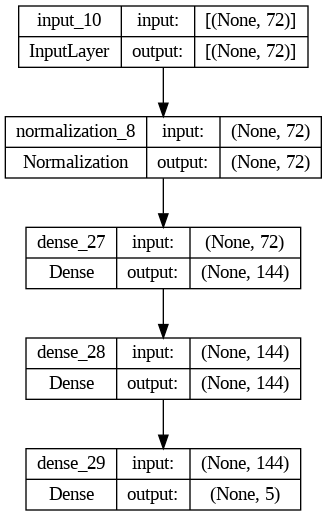

In [191]:
tf.keras.utils.plot_model(model,to_file = "model.png",show_shapes = True)

In [192]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [193]:
history = model.fit(x_train, y_train, epochs=100, verbose=1, validation_data=(x_val, y_val))

Epoch 1/100
116/116 [==============================] - 1s 4ms/step - loss: 0.4295 - accuracy: 0.8422 - val_loss: 0.1517 - val_accuracy: 0.9625
Epoch 2/100
116/116 [==============================] - 0s 3ms/step - loss: 0.1117 - accuracy: 0.9663 - val_loss: 0.0843 - val_accuracy: 0.9788
Epoch 3/100
116/116 [==============================] - 0s 3ms/step - loss: 0.0652 - accuracy: 0.9815 - val_loss: 0.0584 - val_accuracy: 0.9813
Epoch 4/100
116/116 [==============================] - 0s 3ms/step - loss: 0.0434 - accuracy: 0.9875 - val_loss: 0.0467 - val_accuracy: 0.9862
Epoch 5/100
116/116 [==============================] - 0s 3ms/step - loss: 0.0243 - accuracy: 0.9929 - val_loss: 0.0681 - val_accuracy: 0.9788
Epoch 6/100
116/116 [==============================] - 0s 3ms/step - loss: 0.0188 - accuracy: 0.9970 - val_loss: 0.0320 - val_accuracy: 0.9910
Epoch 7/100
116/116 [==============================] - 0s 3ms/step - loss: 0.0115 - accuracy: 0.9981 - val_loss: 0.0265 - val_accuracy: 0.9935

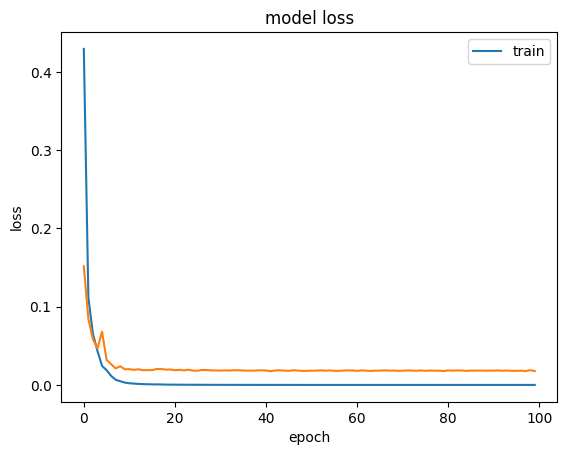

In [194]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'])
plt.show()

In [195]:
model.evaluate(x_test, y_test)

39/39 [==============================] - 0s 2ms/step - loss: 0.0357 - accuracy: 0.9927


[0.03573903441429138, 0.992671012878418]

In [196]:
y_pred = model.predict(x_test)
y_true = y_test

# Convert one-hot encoded labels back to integer labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_true, axis=1)

# Generate the classification report
report = classification_report(y_true_classes, y_pred_classes)

# Print the classification report
print(report)

39/39 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        45
           1       1.00      1.00      1.00       303
           2       0.99      0.98      0.99       239
           3       0.99      1.00      1.00       206
           4       0.99      0.99      0.99       435

    accuracy                           0.99      1228
   macro avg       0.99      0.99      0.99      1228
weighted avg       0.99      0.99      0.99      1228



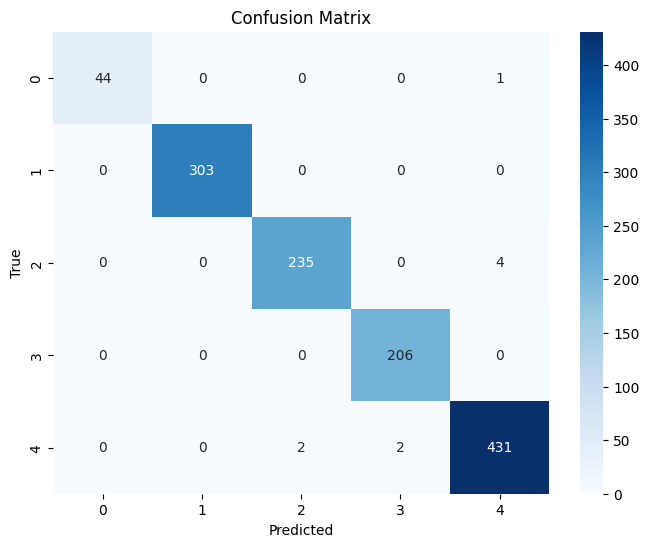

In [197]:
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [204]:
predicted_labels = np.argmax(y_pred, axis=1)
class_labels = ['N', 'O', 'L1', 'L2', 'L3']

# Map indices to class labels
predicted_class_labels = [class_labels[idx] for idx in predicted_labels]
print(predicted_class_labels)

['L3', 'L2', 'O', 'L2', 'O', 'L1', 'L2', 'L3', 'L3', 'O', 'O', 'L1', 'L2', 'O', 'L2', 'L1', 'L1', 'L3', 'L3', 'L3', 'L3', 'O', 'O', 'L1', 'L1', 'L2', 'L1', 'L2', 'O', 'N', 'L1', 'L3', 'L3', 'N', 'L3', 'L3', 'L3', 'L2', 'L3', 'L3', 'L3', 'O', 'L1', 'L1', 'O', 'L2', 'O', 'L1', 'L1', 'L2', 'N', 'L3', 'L3', 'L1', 'L3', 'N', 'L1', 'L1', 'L3', 'N', 'N', 'L3', 'L3', 'L3', 'L3', 'L3', 'O', 'L2', 'L3', 'L3', 'L3', 'L3', 'L2', 'L3', 'O', 'L2', 'L1', 'L2', 'O', 'O', 'L1', 'O', 'L3', 'O', 'L3', 'O', 'L3', 'O', 'L3', 'L3', 'L3', 'O', 'L3', 'O', 'L1', 'L3', 'L3', 'L3', 'L3', 'O', 'O', 'L1', 'L3', 'L2', 'L3', 'L1', 'L1', 'L3', 'O', 'L1', 'L2', 'L2', 'L1', 'L2', 'O', 'L1', 'L3', 'O', 'O', 'L3', 'L3', 'L3', 'L3', 'L3', 'L1', 'L3', 'L3', 'L3', 'O', 'L3', 'O', 'L2', 'L1', 'L2', 'O', 'L2', 'L1', 'L2', 'L3', 'O', 'L3', 'L2', 'L3', 'L1', 'L1', 'L1', 'L1', 'L2', 'L3', 'O', 'L1', 'L3', 'L2', 'L3', 'L3', 'L2', 'O', 'L1', 'L1', 'L2', 'L3', 'O', 'L1', 'L3', 'L2', 'L3', 'L1', 'O', 'L2', 'L2', 'O', 'L3', 'L2', 'L1